# importation des bibliotheques

In [4]:
import numpy as np 
import pandas as pd 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf

In [5]:
df = pd.read_csv('dataset.csv')
df

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


# Test de stationnarité d'Augmented Dickey-Fuller (ADF) sur la série temporelle "value" du DataFrame "df"


In [6]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

# Ce test permet de vérifier si la série a une racine unitaire (non stationnaire) ou non (stationnaire)
result = adfuller(df.value.dropna())  # Suppression des valeurs manquantes avant d'appliquer le test

# Affichage de la statistique ADF et de la p-value
print('ADF Statistic: %f' % result[0])  # Statistique du test ADF
print('p-value: %f' % result[1])  # p-value pour interpréter le résultat (inférieure à 0.05 -> stationnaire)


ADF Statistic: 3.145186
p-value: 1.000000


# Differencing de la serie

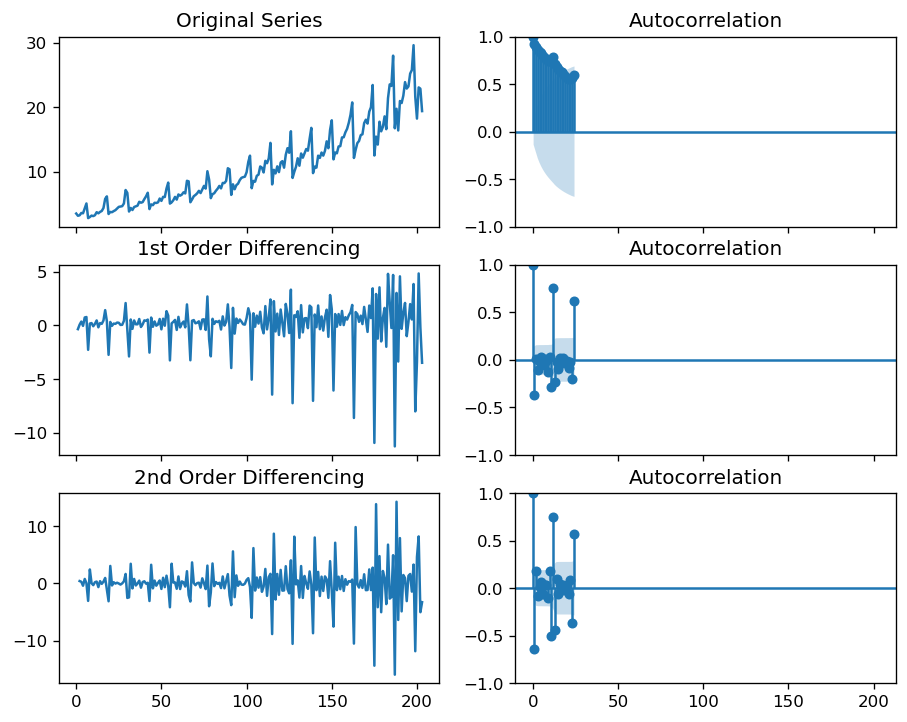

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()



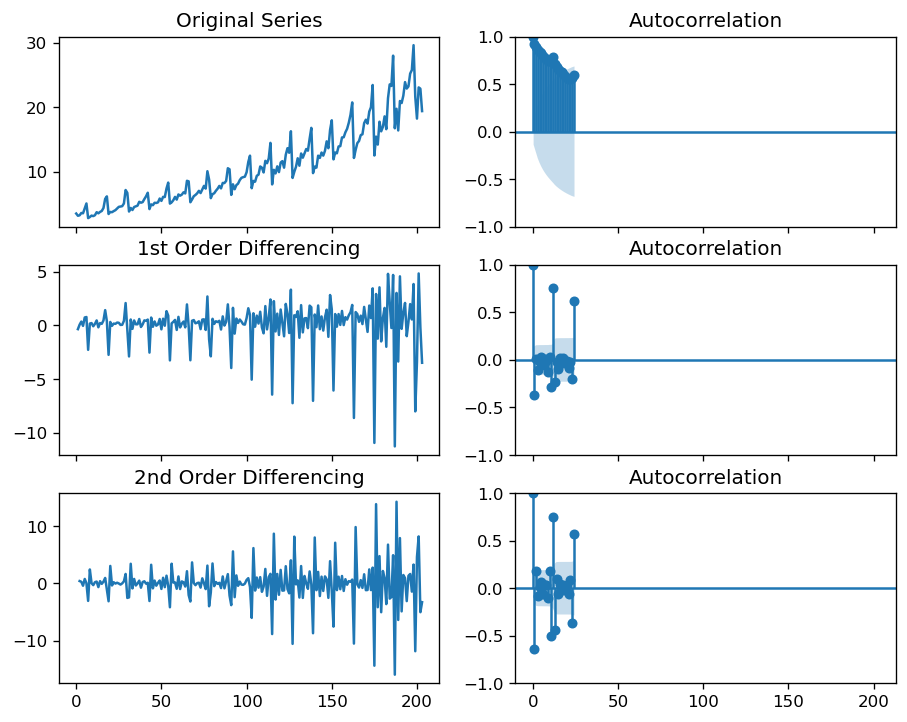

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Configuration de la taille et de la résolution des figures
plt.rcParams.update({'figure.figsize': (9, 7), 'figure.dpi': 120})

# Création d'une figure avec 3 lignes et 2 colonnes, partageant l'axe des abscisses
fig, axes = plt.subplots(3, 2, sharex=True)

# Série originale
axes[0, 0].plot(df.value)  # Tracé de la série temporelle originale
axes[0, 0].set_title('Original Series')  # Titre du graphique
plot_acf(df.value, ax=axes[0, 1])  # Autocorrélation de la série originale

# Différenciation d'ordre 1 (permet d'éliminer une tendance linéaire)
axes[1, 0].plot(df.value.diff())  # Tracé de la série différenciée une première fois
axes[1, 0].set_title('1st Order Differencing')  # Titre du graphique
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])  # Autocorrélation de la série différenciée

# Différenciation d'ordre 2 (permet d'éliminer une tendance quadratique)
axes[2, 0].plot(df.value.diff().diff())  # Tracé de la série différenciée une deuxième fois
axes[2, 0].set_title('2nd Order Differencing')  # Titre du graphique
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])  # Autocorrélation de la série différenciée

# Affichage des graphiques
plt.show()


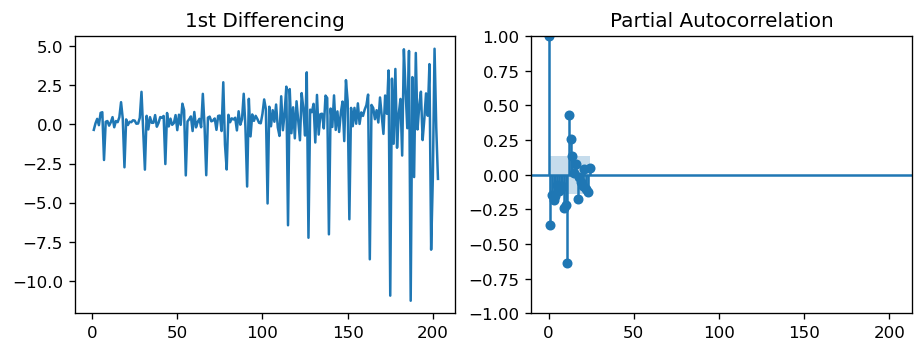

In [20]:
# Configuration de la taille et de la résolution de la figure
plt.rcParams.update({'figure.figsize': (9, 3), 'figure.dpi': 120})

# Création d'une figure avec 1 ligne et 2 colonnes, partageant l'axe des abscisses
fig, axes = plt.subplots(1, 2, sharex=True)

# Tracé de la série différenciée une première fois
axes[0].plot(df.value.diff())  
axes[0].set_title('1st Differencing')  # Titre du graphique

# Tracé de la fonction d'autocorrélation partielle (PACF) après différenciation
axes[1].set(ylim=(0, 5))  # Définition des limites de l'axe des ordonnées
plot_pacf(df.value.diff().dropna(), ax=axes[1])  # Tracé du PACF de la série différenciée

# Affichage des graphiques
plt.show()


# entraînement d'un modèle ARIMA

In [21]:
# Importation du modèle ARIMA
from statsmodels.tsa.arima.model import ARIMA  

# Définition et entraînement d'un modèle ARIMA(1,1,2)
# (1,1,2) signifie :
# - 1 terme autorégressif (AR)
# - 1 différenciation (I, pour rendre la série stationnaire)
# - 2 termes de moyenne mobile (MA)
model = ARIMA(df['value'], order=(1,1,2))  
model_fit = model.fit()  # Ajustement du modèle aux données

# Affichage du résumé des résultats du modèle
print(model_fit.summary())  

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  204
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -424.570
Date:                Mon, 17 Mar 2025   AIC                            857.140
Time:                        23:53:33   BIC                            870.393
Sample:                             0   HQIC                           862.502
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4178      0.356      1.174      0.240      -0.280       1.115
ma.L1         -0.9546      0.377     -2.531      0.011      -1.694      -0.215
ma.L2          0.0969      0.272      0.356      0.7

# les résidus du modèle

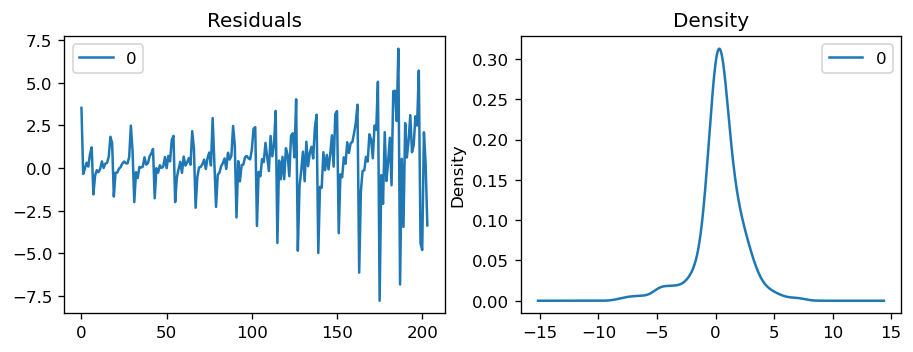

In [11]:
# Création d'un DataFrame pour stocker les résidus du modèle
residuals = pd.DataFrame(model_fit.resid)

# Création d'une figure avec 1 ligne et 2 colonnes pour afficher les graphiques
fig, ax = plt.subplots(1, 2)

# Tracé des résidus au fil du temps pour détecter d'éventuels schémas
residuals.plot(title="Residuals", ax=ax[0])

# Tracé de la densité des résidus (estimation de la distribution)
residuals.plot(kind='kde', title='Density', ax=ax[1])

# Affichage des graphiques
plt.show()


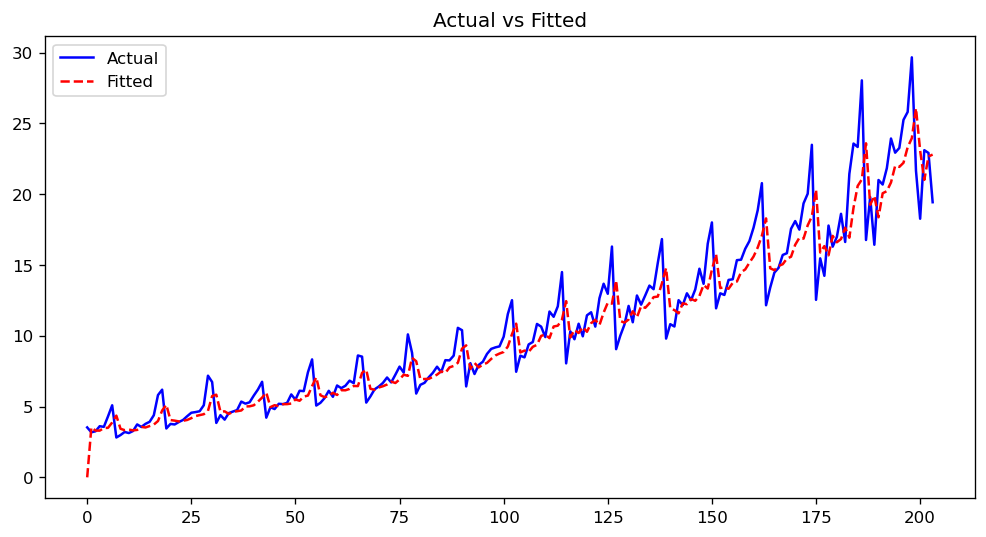

In [12]:
# Définition de la taille de la figure
plt.figure(figsize=(10, 5))

# Tracé des valeurs réelles de la série temporelle
plt.plot(df.index, df['value'], label="Actual", color='blue')

# Tracé des valeurs ajustées par le modèle ARIMA
plt.plot(df.index, model_fit.fittedvalues, label="Fitted", color='red', linestyle='dashed')

# Ajout de la légende pour différencier les courbes
plt.legend()

# Ajout du titre du graphique
plt.title("Actual vs Fitted")

# Affichage du graphique
plt.show()

In [13]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:85]
test = df.value[85:]

In [14]:
from statsmodels.tsa.stattools import acf

# Séparation des données en ensemble d'entraînement et de test
train = df.value[:85]  # Les 85 premières observations pour l'entraînement
test = df.value[85:]   # Le reste des données pour le test

In [15]:
# Construction du modèle ARIMA sur l'ensemble d'entraînement
# (3,2,1) signifie :
# - 3 termes autorégressifs (AR)
# - 2 différenciations (I) pour rendre la série stationnaire
# - 1 terme de moyenne mobile (MA)
model = ARIMA(train, order=(3, 2, 1))  

# Ajustement du modèle aux données d'entraînement
fitted = model.fit()  

# Affichage du résumé des résultats du modèle
print(fitted.summary())



                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -116.886
Date:                Mon, 17 Mar 2025   AIC                            243.771
Time:                        23:49:43   BIC                            255.865
Sample:                             0   HQIC                           248.630
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2205      0.194     -1.139      0.255      -0.600       0.159
ar.L2         -0.3434      0.141     -2.441      0.015      -0.619      -0.068
ar.L3         -0.0936      0.252     -0.371      0.7

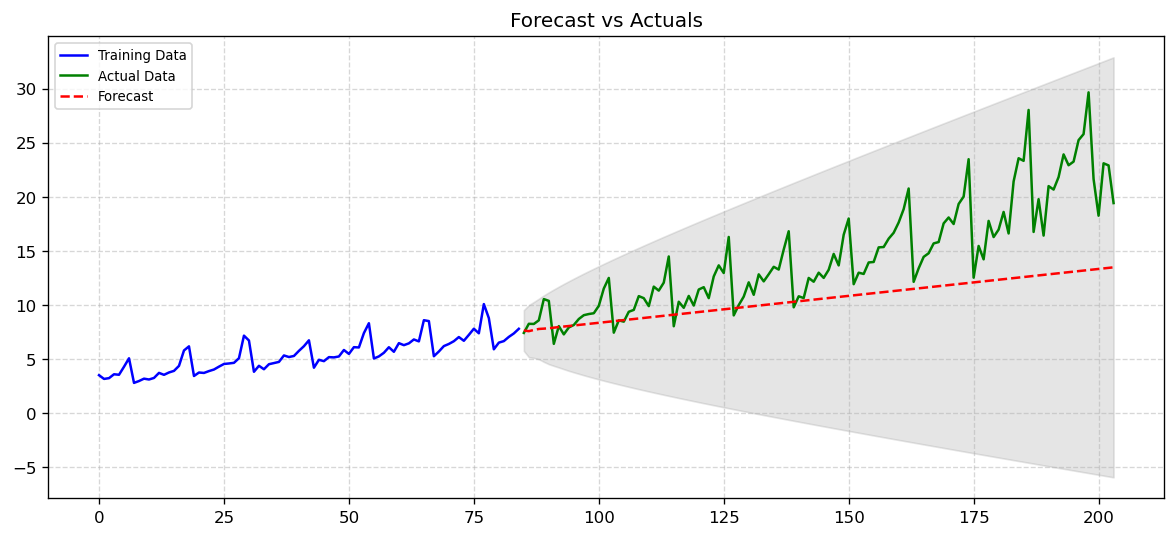

In [16]:
#  Prédiction sur 119 périodes
n_forecast = 119
forecast_object = fitted.get_forecast(steps=n_forecast)

#  Récupérer les valeurs prédites et les intervalles de confiance
fc = forecast_object.predicted_mean  # Prédictions
conf = forecast_object.conf_int(alpha=0.05)  # Intervalle de confiance 95%

# Convertir en pandas Series
fc_series = pd.Series(fc.values, index=test.index[:n_forecast])
lower_series = pd.Series(conf.iloc[:, 0].values, index=test.index[:n_forecast])
upper_series = pd.Series(conf.iloc[:, 1].values, index=test.index[:n_forecast])

# Tracer les résultats
plt.figure(figsize=(12,5))

plt.plot(train, label='Training Data', color='blue')
plt.plot(test, label='Actual Data', color='green')
plt.plot(fc_series, label='Forecast', color='red', linestyle='dashed')

# Ajout de l'intervalle de confiance
plt.fill_between(test.index[:n_forecast], lower_series, upper_series, color='gray', alpha=0.2)

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [17]:
def forecast_accuracy(forecast, actual):
    # Vérifier que les tailles correspondent
    forecast = np.array(forecast)
    actual = np.array(actual)
    
    # Éviter les erreurs de division par zéro pour MAPE et MPE
    nonzero_actual = actual != 0  # Mask pour éviter les divisions par zéro
    
    mape = np.mean(np.abs(forecast[nonzero_actual] - actual[nonzero_actual]) / np.abs(actual[nonzero_actual]))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast[nonzero_actual] - actual[nonzero_actual]) / actual[nonzero_actual])  # MPE
    rmse = np.sqrt(np.mean((forecast - actual) ** 2))  # RMSE
    corr = np.corrcoef(forecast, actual)[0, 1] if len(forecast) > 1 else np.nan  # Corr (évite erreur si trop court)
    
    # Min-Max Accuracy
    mins = np.minimum(forecast, actual)
    maxs = np.maximum(forecast, actual)
    minmax = 1 - np.mean(mins / maxs) if np.any(maxs != 0) else np.nan  

    # ACF(1) : Auto-corrélation du résidu (corrélation des erreurs de prédiction avec elles-mêmes)
    residuals = forecast - actual
    if len(residuals) > 1:
        acf_values = acf(residuals, nlags=1, fft=True)  # fft=True pour éviter warnings sur séries longues
        acf1 = acf_values[1]  # Premier lag
    else:
        acf1 = np.nan  # Pas assez de données pour calculer ACF

    return {
        'mape': mape, 'me': me, 'mae': mae,
        'mpe': mpe, 'rmse': rmse, 'acf1': acf1,
        'corr': corr, 'minmax': minmax
    }

# Appliquer la fonction avec les données corrigées
metrics = forecast_accuracy(fc, test.values)
print(metrics)


{'mape': 0.23266217349524573, 'me': -3.880605037989239, 'mae': 3.981649980324332, 'mpe': -0.21930021404561884, 'rmse': 5.307120322547632, 'acf1': 0.6960287524422745, 'corr': 0.873688554287201, 'minmax': 0.23186308382897602}
